<a href="https://colab.research.google.com/github/ValentinoFernandez/Aplicacion-SIS310/blob/main/Lab_2_regresion_lineal_multivariable_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab#2 - Regresión lineal con multiples variables**

In [62]:
import os
import numpy as np
from matplotlib import pyplot
#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ventas semanales en Waltmart

Se implementa la regresión lineal multivariable para predecir las ventas semanales en las tiendas de Walmart. El archivo walmart_cleaned.csv contiene un conjunto de datos que refleja información relacionada con las tiendas de Walmart, incluyendo factores como el precio del combustible, el índice de precios al consumidor (CPI), y el tamaño de la tienda, entre otros.

La variable de salida es Weekly_Sales, la cual se predice en función de las demás variables independientes mencionadas. Estas incluyen el identificador de la tienda, el departamento, la temperatura, el precio del combustible, el CPI, el desempleo, y el tamaño de la tienda.


Primero, cargan los datos, selecciona las características y la variable objetivo, verifica el número de ejemplos y muestra los primeros 10 ejemplos para proporcionar una visión general de cómo están estructurados los datos antes de que sean utilizados para construir un modelo de regresión.

In [64]:
# Leer datos
data = pd.read_csv('/content/drive/MyDrive/Sistemas/Universidad - Sistemas/7mo semestre/IA/Laboratorio/Laboratorio2/walmart_cleaned.csv', delimiter=',')
# Vamos a elegir 9 variables de entrada para predecir 'Weekly_Sales'
X = data[['Store', 'IsHoliday', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'CPI']].values
y = data['Weekly_Sales'].values

# Verificar el número de ejemplos
m = y.size
print(f'Número de ejemplos: {m}')

# Imprimir algunas filas de los datos
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'y'))
print('-' * 100)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], y[i]))

Número de ejemplos: 421570
  X[:,0] X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]   X[:, 7]   X[:, 8]         y
----------------------------------------------------------------------------------------------------
       1       0         1     42.31      2.57      0.00      0.00      0.00    211.10  24924.50
       1       0        26     42.31      2.57      0.00      0.00      0.00    211.10  11737.12
       1       0        17     42.31      2.57      0.00      0.00      0.00    211.10  13223.76
       1       0        45     42.31      2.57      0.00      0.00      0.00    211.10     37.44
       1       0        28     42.31      2.57      0.00      0.00      0.00    211.10   1085.29
       1       0        79     42.31      2.57      0.00      0.00      0.00    211.10  46729.77
       1       0        55     42.31      2.57      0.00      0.00      0.00    211.10  21249.31
       1       0         5     42.31      2.57      0.00      0.00      0.00    211.10  32229.38

In [65]:
X.shape

(421570, 9)

#Se normalizan los datos#
Este código toma las características de entrada, calcula la media y la desviación estándar de cada una, y normaliza los valores para que cada característica tenga una media de 0 y una desviación estándar de 1. Luego, muestra estos resultados para ver cómo se ven los datos antes y después de la normalización. Es muy importante para tener un mejor manejo de los datos

In [66]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [82]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[  1.          0.          1.        ...   0.          0.
  211.0963582]
 [  1.          0.         26.        ...   0.          0.
  211.0963582]
 [  1.          0.         17.        ...   0.          0.
  211.0963582]
 ...
 [ 45.          0.         32.        ...  58.08      100.
  192.3088989]
 [ 45.          0.         83.        ...  58.08      100.
  192.3088989]
 [ 45.          0.         98.        ...  58.08      100.
  192.3088989]]
Media calculada: [2.22005456e+01 7.03584221e-02 4.42603174e+01 6.00900587e+01
 3.36102653e+00 2.59007482e+03 8.79974298e+02 4.68087665e+02
 1.71201947e+02]
Desviación estandar calculada: [1.27852822e+01 2.55750102e-01 3.04920179e+01 1.84479093e+01
 4.58513993e-01 6.05237876e+03 5.08453277e+03 5.52886690e+03
 3.91592292e+01]
[[-1.65819926 -0.27510614 -1.41874236 ... -0.17306886 -0.08466249
   1.01877417]
 [-1.65819926 -0.27510614 -0.59885566 ... -0.17306886 -0.08466249
   1.01877417]
 [-1.65819926 -0.27510614 -0.89401487 ... -0.17306886 -0.08466

# Se crean los gráficos
La creación de gráficos que muestran la relación entre varias características (como el precio del combustible, la temperatura, descuentos, etc.) y la variable objetivo (Ventas Semanales). Es una buena manera de visualizar cómo cada característica afecta la variable de salida y de identificar patrones que podrían ser útiles para la modelización predictiva.

In [68]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

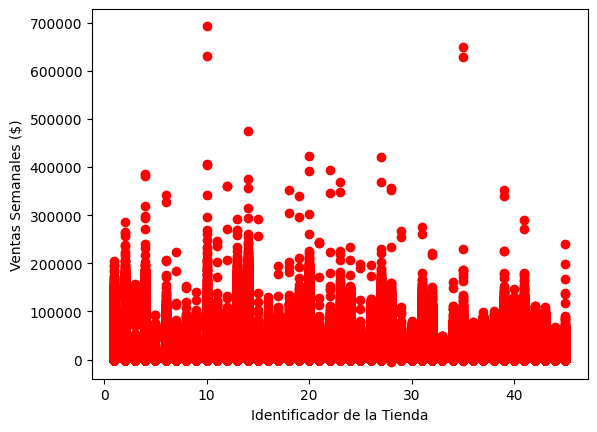

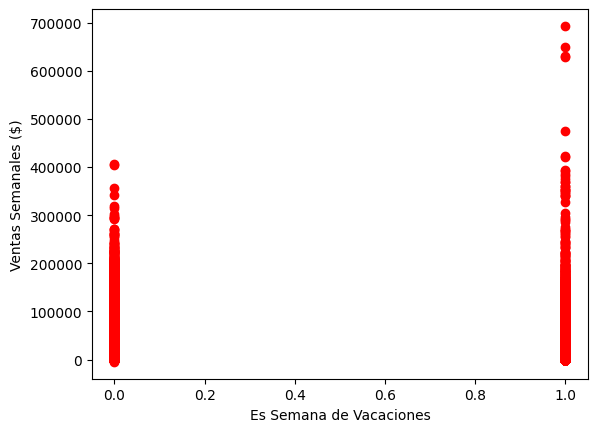

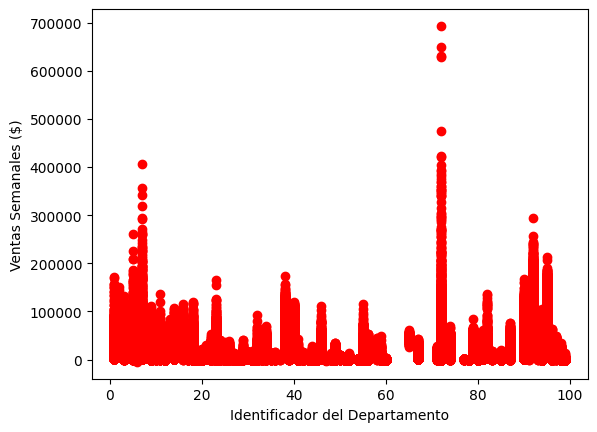

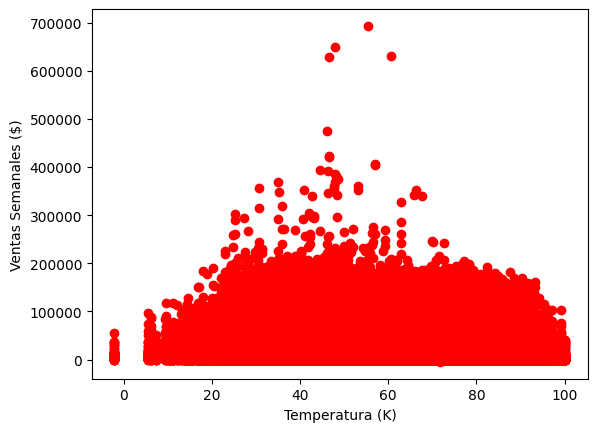

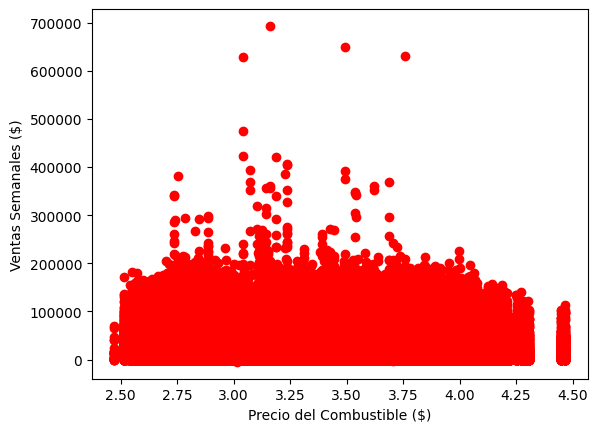

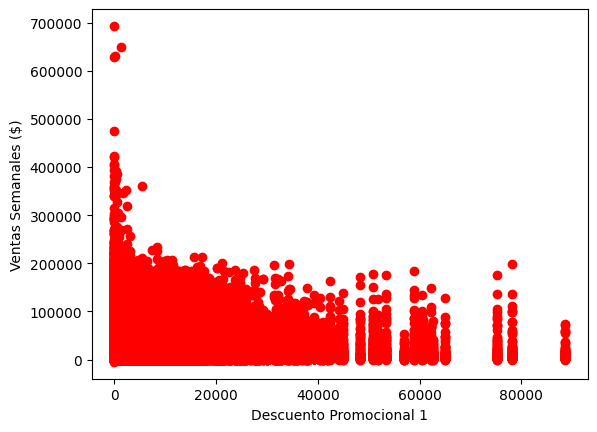

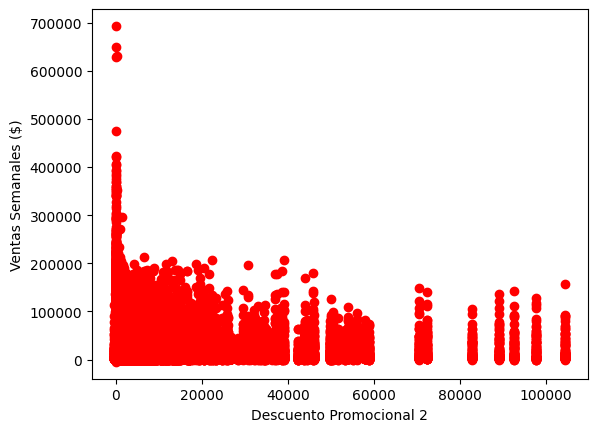

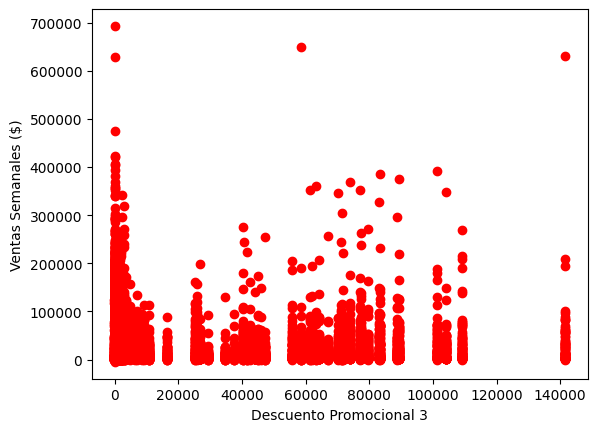

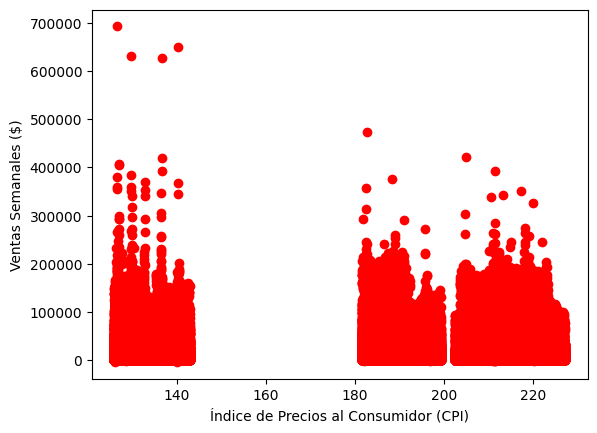

In [69]:
# Definir los nombres de las variables de entrada
xlabel1 = "Identificador de la Tienda"
xlabel2 = "Es Semana de Vacaciones"
xlabel3 = "Identificador del Departamento"
xlabel4 = "Temperatura (K)"
xlabel5 = "Precio del Combustible ($)"
xlabel6 = "Descuento Promocional 1"
xlabel7 = "Descuento Promocional 2"
xlabel8 = "Descuento Promocional 3"
xlabel9 = "Índice de Precios al Consumidor (CPI)"
ylabel1 = "Ventas Semanales ($)"

# Graficar cada variable de entrada contra la variable de salida
graficarDatos(X[:, 0], y, xlabel1, ylabel1)  # Store vs Weekly Sales
graficarDatos(X[:, 1], y, xlabel2, ylabel1)  # IsHoliday vs Weekly Sales
graficarDatos(X[:, 2], y, xlabel3, ylabel1)  # Dept vs Weekly Sales
graficarDatos(X[:, 3], y, xlabel4, ylabel1)  # Temperature vs Weekly Sales
graficarDatos(X[:, 4], y, xlabel5, ylabel1)  # Fuel Price vs Weekly Sales
graficarDatos(X[:, 5], y, xlabel6, ylabel1)  # MarkDown1 vs Weekly Sales
graficarDatos(X[:, 6], y, xlabel7, ylabel1)  # MarkDown2 vs Weekly Sales
graficarDatos(X[:, 7], y, xlabel8, ylabel1)  # MarkDown3 vs Weekly Sales
graficarDatos(X[:, 8], y, xlabel9, ylabel1)  # CPI vs Weekly Sales


# Interpretación de los gráficos
**Identificador de la Tienda vs. Ventas Semanales**: No parece haber una relación fuerte entre el identificador de la tienda y las ventas semanales. Las ventas están distribuidas de manera bastante uniforme entre las tiendas.

**Es Semana de Vacaciones vs. Ventas Semanales**: Parece que hay un ligero aumento en las ventas durante las semanas de vacaciones, pero no es un cambio drástico.

**Identificador del Departamento vs. Ventas Semanales:** Algunas categorías de departamentos (como la 60 y 80) parecen tener ventas más altas en comparación con otras, lo que podría indicar que ciertos departamentos son más populares.

**Temperatura vs. Ventas Semanales:** Las ventas parecen ser más bajas a temperaturas extremas (tanto muy bajas como muy altas), con un pico en un rango de temperatura intermedio.

**Precio del Combustible vs. Ventas Semanales:** No se observa una relación clara entre el precio del combustible y las ventas semanales.

**Descuentos Promocionales vs. Ventas Semanales:** En general, parece que mayores descuentos están asociados con un mayor número de ventas, pero este efecto parece disminuir con el aumento del monto del descuento.

**Índice de Precios al Consumidor (CPI) vs. Ventas Semanales:** Existe cierta variabilidad en las ventas a diferentes niveles de CPI, pero no se observa una tendencia clara.


# Preparamos los datos para la regresión
prepara los datos de entrada para un modelo de regresión lineal multivariable añadiendo una columna de unos (para el término de sesgo), define una función para calcular el costo (error) del modelo, y evalúa el costo usando un vector inicial de parámetros theta. El costo obtenido se utiliza típicamente como un punto de referencia inicial antes de optimizar theta usando un algoritmo como el descenso por gradiente.

In [83]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

In [84]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [72]:
theta = np.array([0.1] * X_ready.shape[1])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] se obtiene un costo de: 385596663.75010324


# Implementamos el descenso de gradiantes

 Implementamos y ejecutamos el algoritmo de descenso por gradiente para encontrar los valores óptimos de theta que minimizan el costo en un modelo de regresión lineal. Además, visualiza cómo disminuye el costo durante el proceso iterativo, lo que permite verificar si el algoritmo converge hacia un mínimo.

In [73]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Los valores de theta calculados son: [ 1.59805362e+04 -2.10272917e+03  3.68675408e+00  3.40244785e+03
  1.87939756e+02 -3.99176944e+02  1.04046627e+03  2.61486131e+02
  8.55357534e+02 -9.97370294e+02]
Con un costo de: 248915561.40310344


Text(0, 0.5, 'Costo J')

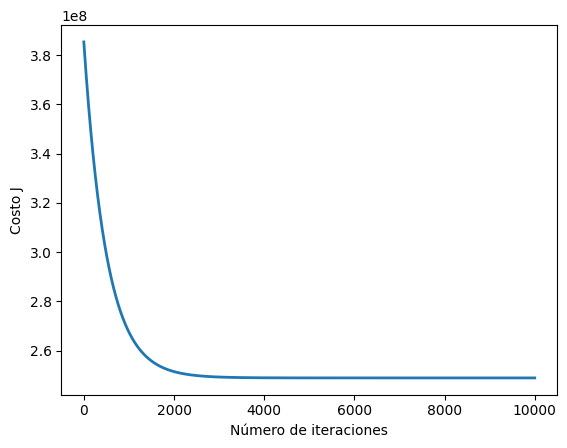

In [88]:
theta = np.zeros(10)

num_ite = 10000
alpha = 0.001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)

print(f"Los valores de theta calculados son: {theta}")
print(f"Con un costo de: {J_historico[-1]}")

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_historico)), J_historico, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')


# Relacionamos datos
Visualizamos la relación entre las características de un conjunto de datos y la predicción realizada por un modelo de regresión lineal. Específicamente, muestra cómo una característica específica (columna 5 de X_ready) se relaciona con otra característica (columna 1 de X_ready) y cómo la línea de regresión lineal intenta ajustar esos datos.

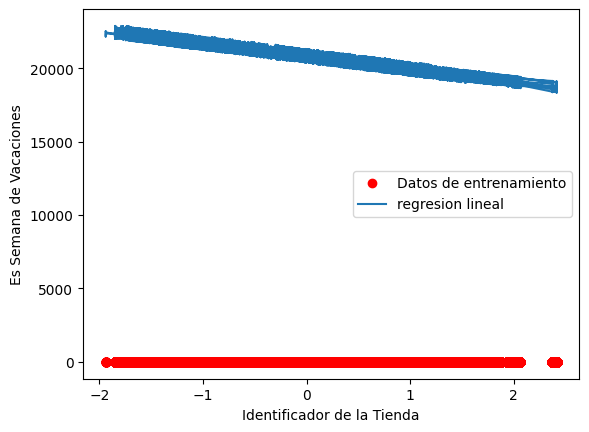

In [126]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_ready[:, 5],X_ready[:, 1], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 5], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])


# Interpretación del gráfico
El gráfico sugiere que el modelo de regresión lineal no está capturando adecuadamente la relación entre estas dos variables, probablemente debido a la naturaleza de los datos. Dado que "Es Semana de Vacaciones" es una variable categórica, y el "Identificador de la Tienda" no parece tener una relación directa o lineal con ella, la línea de regresión no representa bien la distribución de los puntos rojos (especialmente aquellos en el nivel 0

# Predicción

Las ventas semanales de Walmart, considerando las siguientes características:



*   Tienda: 5


*   Es semana de vacaciones: Sí (1)
*   Departamento: 35

*   Temperatura: 45.0 °F
*   Precio del combustible: $3.2

*   Markdown 1: $1000

*   Markdown 2: $2000

*   Markdown 3: $1500
*   CPI (Índice de Precios al Consumidor): 220.0

se predicen que serán 16,477 $.

Por lo tanto, bajo estas condiciones específicas, el modelo de regresión lineal sugiere que esta tienda en particular debería esperar unas ventas semanales cercanas a 16,477 unidades monetarias. Este valor refleja la influencia combinada de los descuentos ofrecidos (Markdowns), la variación de precios del combustible, la temperatura, y si es una semana de vacaciones, entre otros factores. Esto permite a la empresa anticipar y planificar su inventario y estrategias de marketing en consecuencia.


In [94]:
# Selecciona características ejemplo:
store = 5
is_holiday = 1
dept = 35
temperature = 45.0
fuel_price = 3.2
markdown1 = 1000
markdown2 = 2000
markdown3 = 1500
cpi = 220.0

# Crea el vector de predicción con las características normalizadas
x_pred = np.array([
    1,  # Término de sesgo
    (store - mu[0]) / sigma[0],
    (is_holiday - mu[1]) / sigma[1],
    (dept - mu[2]) / sigma[2],
    (temperature - mu[3]) / sigma[3],
    (fuel_price - mu[4]) / sigma[4],
    (markdown1 - mu[5]) / sigma[5],
    (markdown2 - mu[6]) / sigma[6],
    (markdown3 - mu[7]) / sigma[7],
    (cpi - mu[8]) / sigma[8]
])

# Paso 2: Realizar la predicción usando el modelo entrenado (theta)
y_pred = np.dot(x_pred, theta)
print(f'La predicción de ventas semanales para estas características es: {y_pred}')

La predicción de ventas semanales para estas características es: 16476.994664055153


# La ecuación de la normal
Ejecutamos el algoritmo para realizar el calculo de los valores mediante la ecuación de la normal.

In [96]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [97]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [98]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [ 2.08280990e+04 -1.64499602e+02  1.26844864e+01  1.11589992e+02
  1.02976942e+01 -8.76734067e+02  1.72210556e-01  5.15128209e-02
  1.54832207e-01 -2.55293051e+01]


Los valores de
𝜃
θ obtenidos representan los coeficientes que se multiplicarán por las características de entrada para predecir la salida (en este caso, las ventas semanales). Estos valores son:

𝜃
0
θ
0
​
  = 20828.0990: Este es el término independiente del modelo, que representa el valor base de las ventas semanales cuando todas las demás características son cero.
𝜃
1
θ
1
​
  = -164.4960: Este coeficiente se asocia con la primera característica (probablemente el identificador de la tienda). Indica que, en promedio, por cada unidad de incremento en esta característica, las ventas semanales disminuyen en 164.5 unidades, manteniendo las demás variables constantes.
𝜃
2
θ
2
​
  = 12.6848: Relacionado con la segunda característica (quizás el indicador de si es una semana de vacaciones). Este valor indica que un incremento en esta característica incrementa las ventas semanales en aproximadamente 12.7 unidades.
Y así sucesivamente para los demás valores de
𝜃
θ.
Estos coeficientes pueden ser interpretados en el contexto de las características específicas del modelo, permitiendo comprender cómo cada una de las variables de entrada impacta en las ventas semanales previstas.

# Predicción
Las ventas semanales de Walmart, considerando las siguientes características:

Tienda: 5
Es semana de vacaciones: Sí (1)

Departamento: 35

Temperatura: 45.0 °F

Precio del combustible: $3.2

Markdown 1: $1000

Markdown 2: $2000

Markdown 3: $1500

CPI (Índice de Precios al Consumidor): 220.0

se predicen que serán 16,477 $.

Por lo tanto, bajo estas condiciones específicas, el modelo de regresión lineal sugiere que esta tienda en particular debería esperar unas ventas semanales cercanas a 21,329 unidades monetarias. Este valor refleja la influencia combinada de los descuentos ofrecidos (Markdowns), la variación de precios del combustible, la temperatura, y si es una semana de vacaciones, entre otros factores. Esto permite a la empresa anticipar y planificar su inventario y estrategias de marketing en consecuencia.

In [100]:
# Selecciona características ejemplo:
store = 5
is_holiday = 1
dept = 35
temperature = 45.0
fuel_price = 3.2
markdown1 = 1000
markdown2 = 2000
markdown3 = 1500
cpi = 220.0

# Crea el vector de predicción con las características normalizadas
x_pred = np.array([
    1,  # Término de sesgo
    (store - mu[0]) / sigma[0],
    (is_holiday - mu[1]) / sigma[1],
    (dept - mu[2]) / sigma[2],
    (temperature - mu[3]) / sigma[3],
    (fuel_price - mu[4]) / sigma[4],
    (markdown1 - mu[5]) / sigma[5],
    (markdown2 - mu[6]) / sigma[6],
    (markdown3 - mu[7]) / sigma[7],
    (cpi - mu[8]) / sigma[8]
])

# Paso 2: Realizar la predicción usando el modelo entrenado (theta)
y_pred = np.dot(x_pred, theta)
print(f'La predicción de ventas semanales para estas características es: {y_pred}')

La predicción de ventas semanales para estas características es: 21329.285597022037
